# 1. Imports packages

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from library.sb_utils import save_file

In [388]:
sns.set()

# 2. Load Data

In [389]:
df = pd.read_csv("bank.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


*Bank client data:*
1. age: (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-emplo yed','services','student','technician','unemployed','unknown')
3. marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education: (categorical: primary, secondary, tertiary and unknown)
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. balance: Balance of the individual.

*Related with the last contact of the current campaign:*

9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day: last contact day of the month (numeric: 1-31)
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*Other attributes:*

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously
contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Output variable (desired target):**

17. y - has the client subscribed a term deposit? (binary: 'yes','no')

# 3. EDA

## 3.1 Exam our target variable: deposit

<AxesSubplot:xlabel='deposit', ylabel='count'>

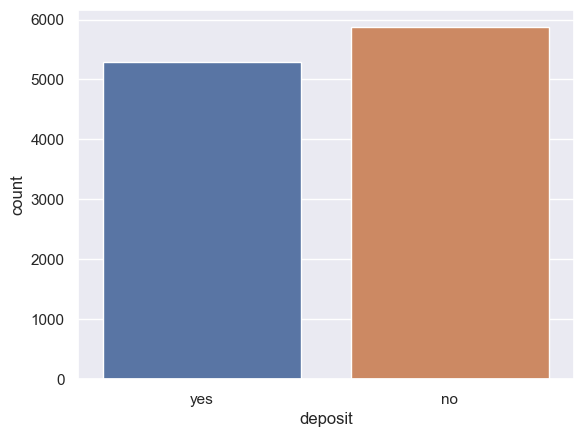

In [390]:
sns.countplot(x= 'deposit', data=df)

On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.

## 3.2 Exam Client's Demographic:

- age: (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-emplo yed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical: primary, secondary, tertiary and unknown)
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- balance: Balance of the individual.

In [391]:
df_demographic = df[['age','job','marital','education','default','housing','loan','balance']]

In [123]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   balance    11162 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 697.8+ KB


In [392]:
df_demographic.duplicated().sum()

846

In [393]:
df_demographic = df_demographic.drop_duplicates()

In [394]:
df_demographic.duplicated().sum()

0

### 3.2.1 Client Demographic Distribution with Percentage Labels

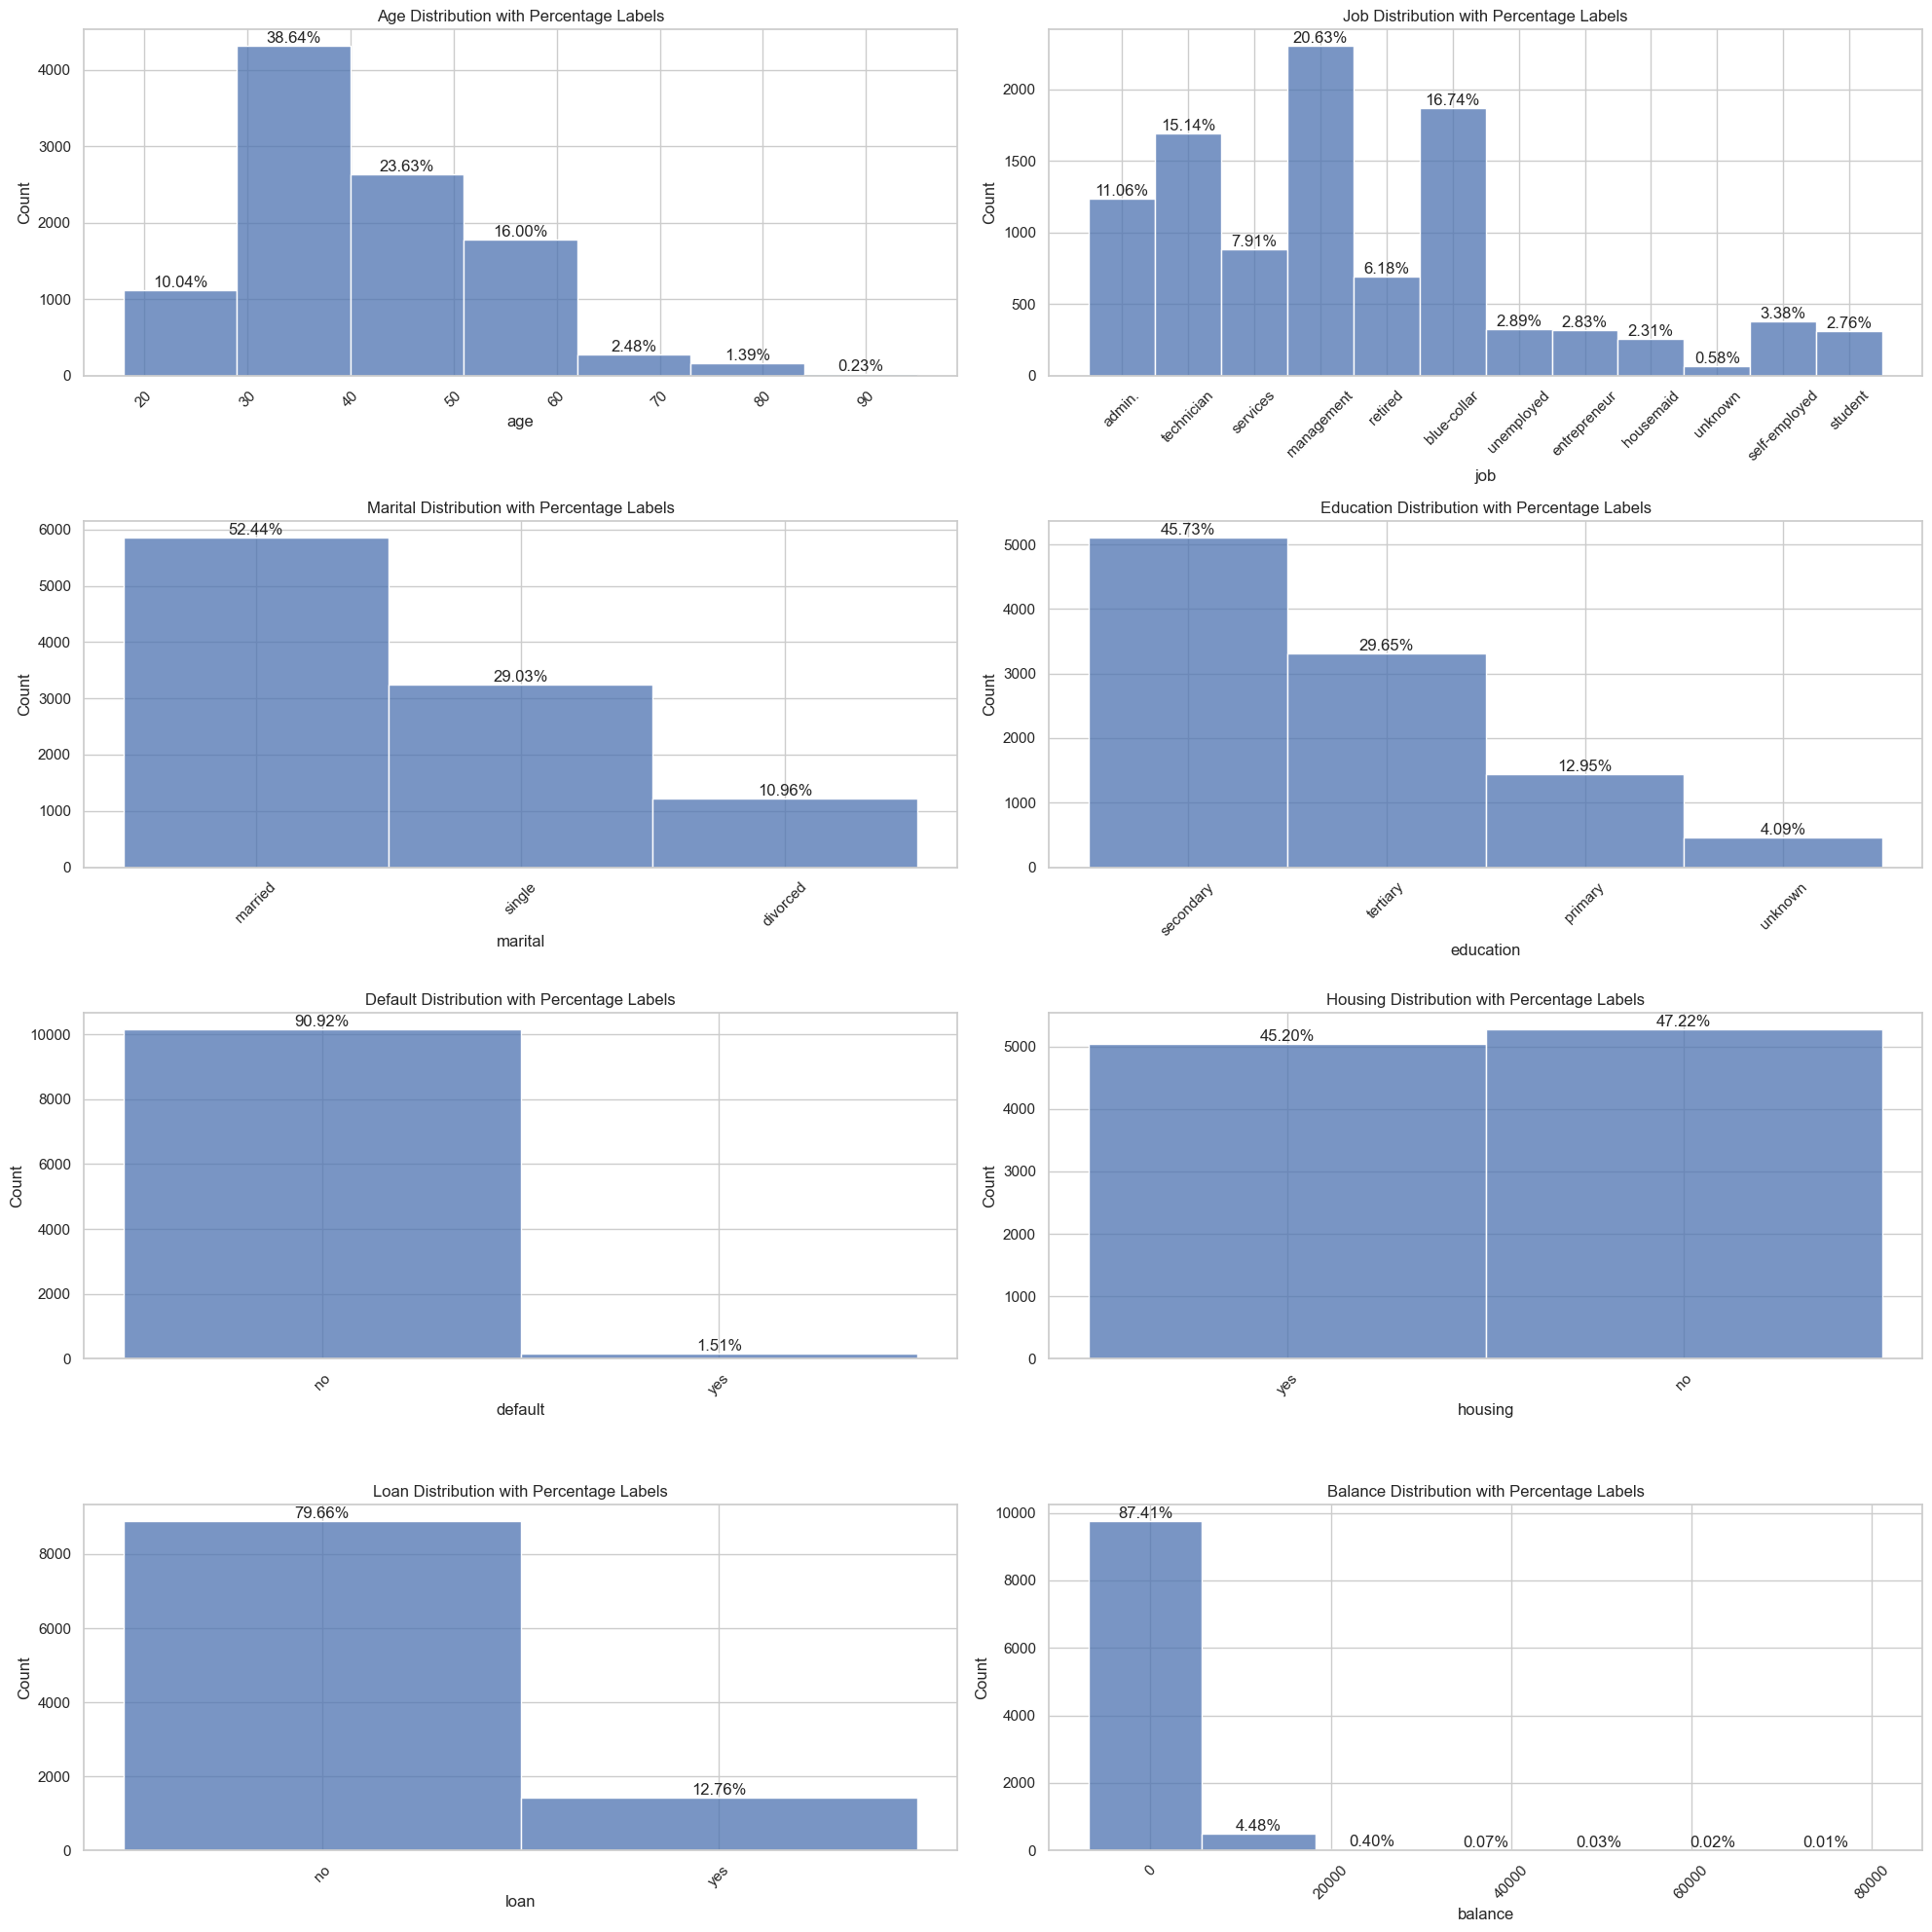

In [187]:
# List of columns to plot
columns_to_plot = df_demographic.columns.tolist()

# Define the number of rows and columns for the grid
n_rows = 4
n_cols = 2

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Create a histogram plot with percentage labels for each column
for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]
    sns.histplot(x=column, data=df_demographic, bins=7, ax=ax)

    # Calculate the total count of data points in the current column
    total = len(df[column])

    # Add percentage labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.2f}%'.format(100 * height / total),
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12)

    # Set the title and rotate x-axis labels
    ax.set_title(f"{column.capitalize()} Distribution with Percentage Labels")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout and show the grid of plots
plt.tight_layout()
plt.show()

- 36% of clients are in the age 30's-40's 
- Top 3 job: 20% of clients work in mamangement, followed by 16% in blue-collar, and 15% technician.
- More than half with 52% are married
- 45% have a secondary education
- Mostly have no loan and no default credit card. 
- Halh half in terms of housing
- 90% have balance below $20,000

### 3.2.2 Demographic Distribution vs Target variable with Percentage Labels

In [395]:
df_demographic_deposit = df[['age','job','marital','education','default','housing','loan','balance','deposit']]

In [396]:
df_demographic_deposit = df_demographic_deposit.drop_duplicates()

In [397]:
df_demographic_deposit.duplicated().sum()

0

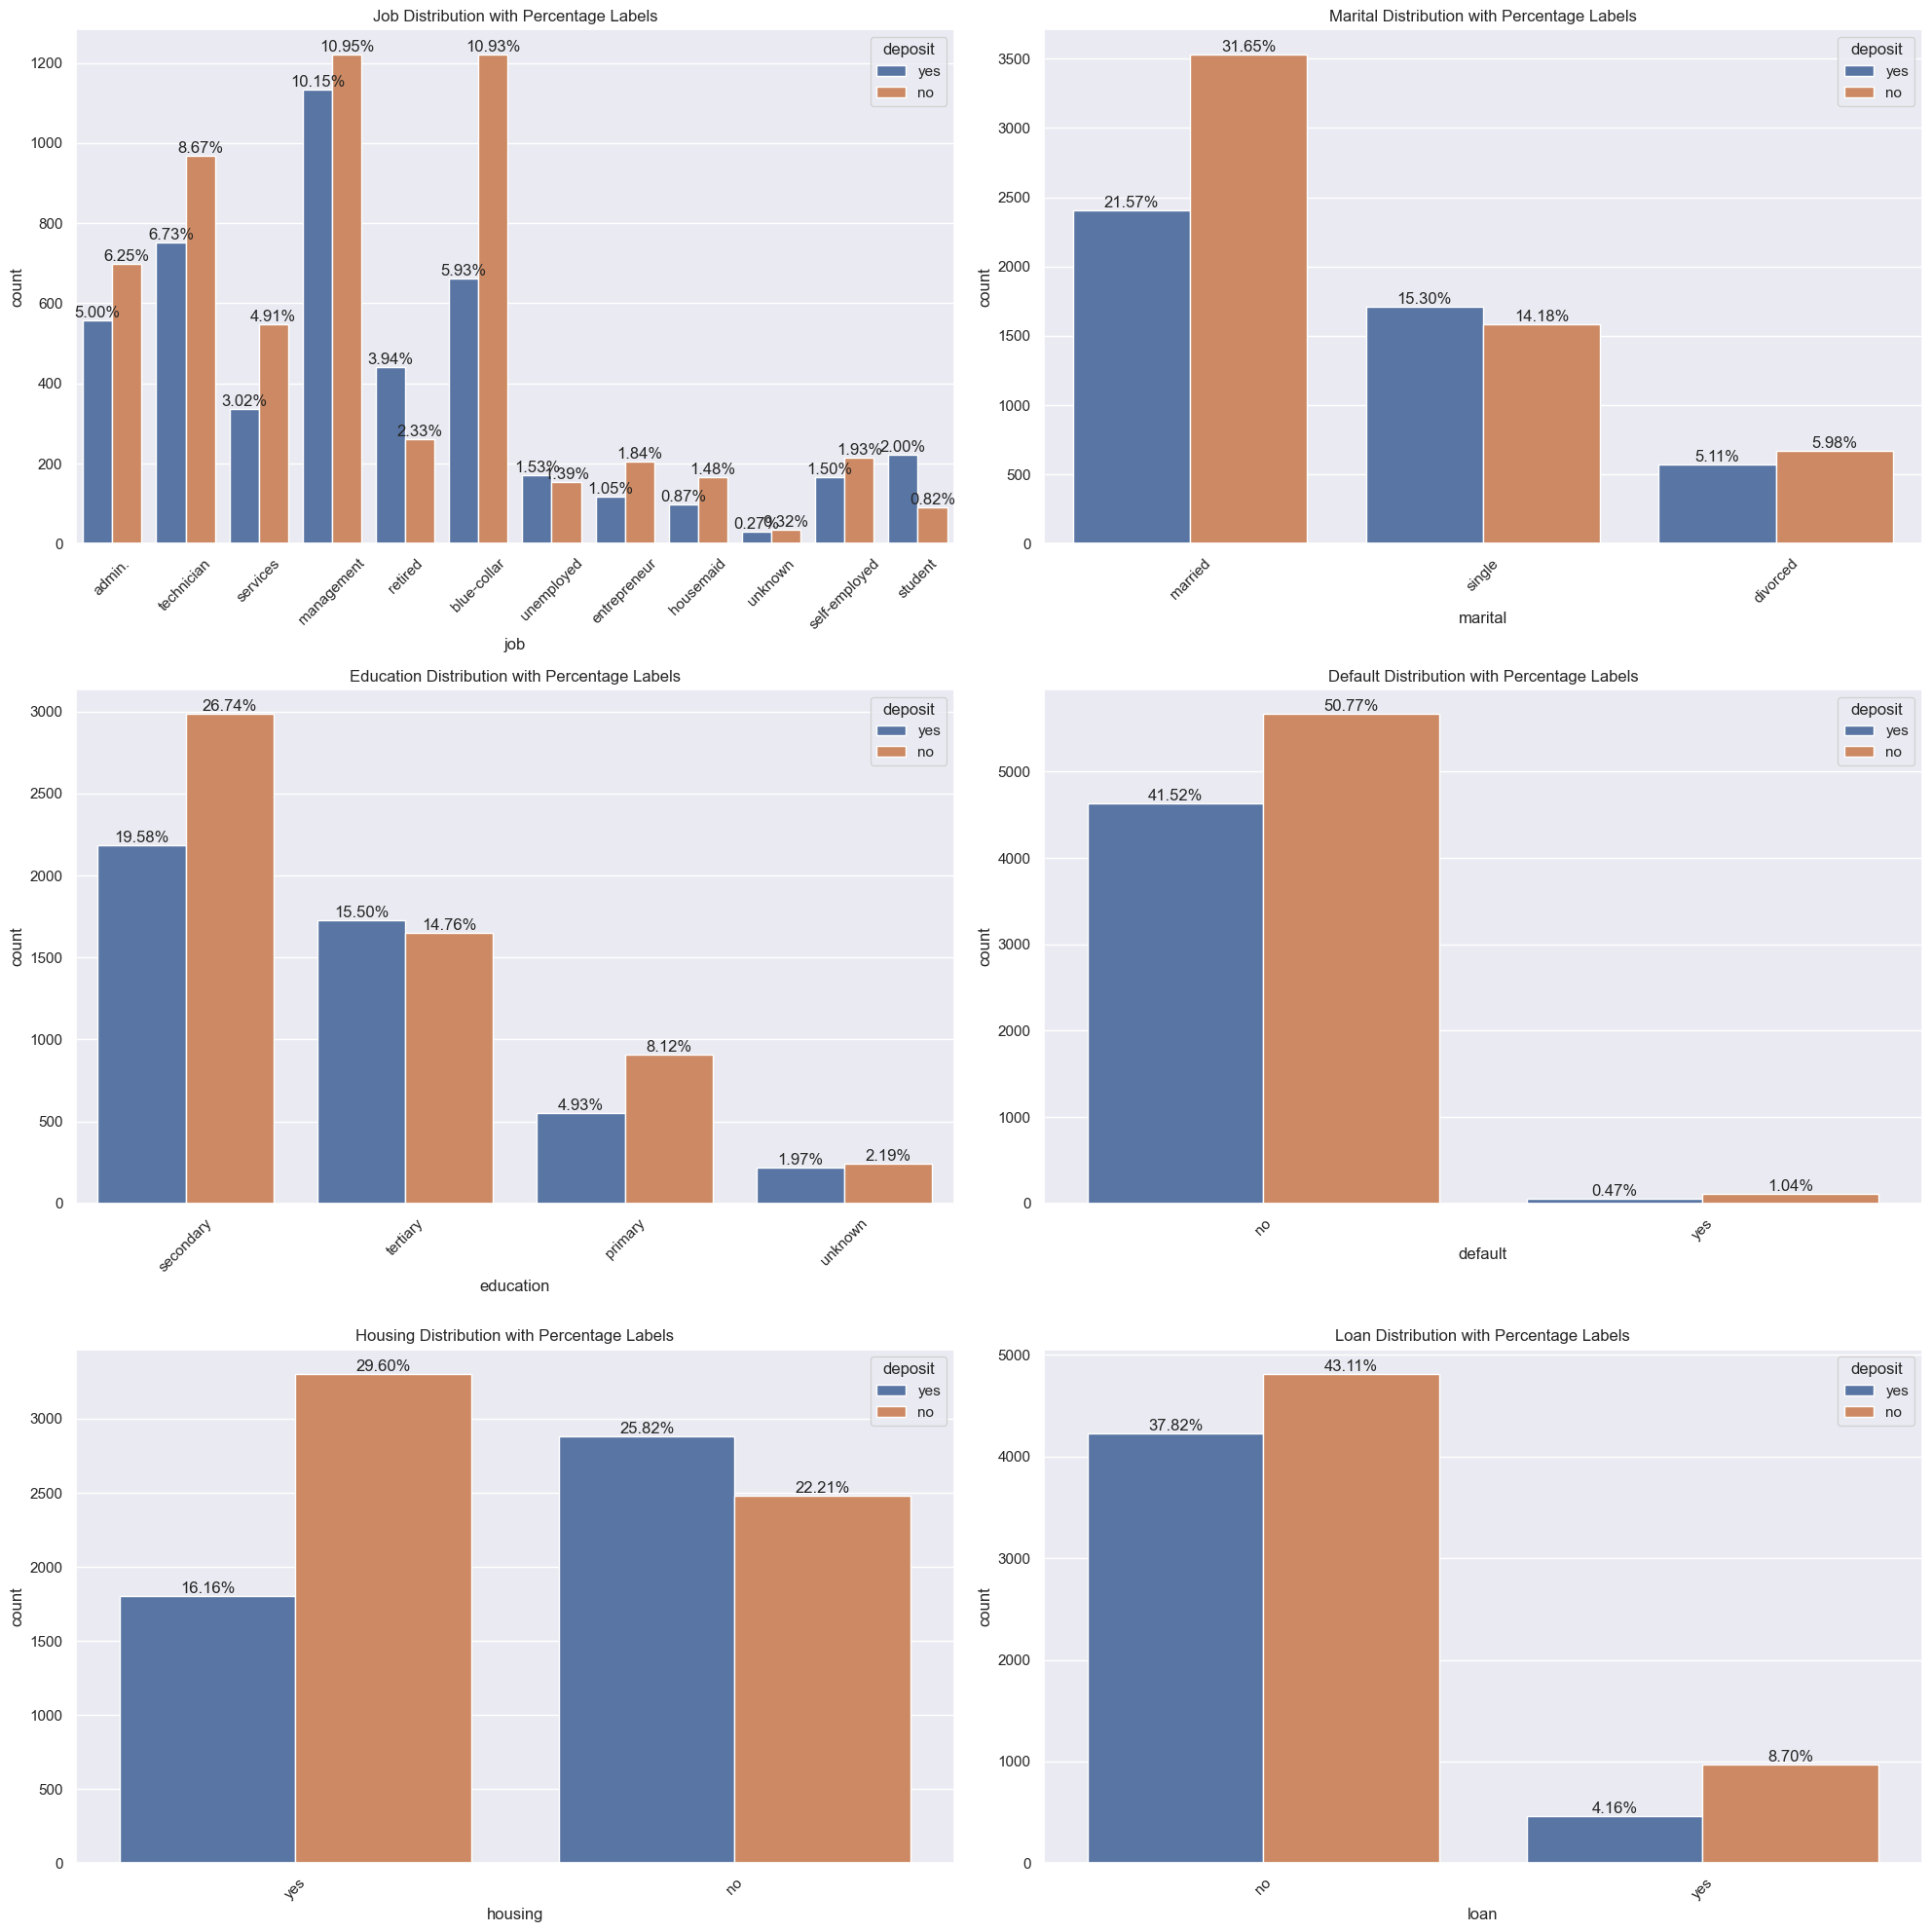

In [399]:
columns_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Define the number of rows and columns for the grid
n_rows = 3
n_cols = 2

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Create a count plot with percentage labels for each column
for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]
    sns.countplot(x=column, data=df_demographic_deposit, ax=ax, hue='deposit')

    # Calculate the total count of data points in the current column
    total = len(df[column])

    # Add percentage labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.2f}%'.format(100 * height / total),
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12)

    # Set the title and rotate x-axis labels
    ax.set_title(f"{column.capitalize()} Distribution with Percentage Labels")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout and show the grid of plots
plt.tight_layout()
plt.show()

In terms of comparing with deposit, client's demographic aligns our previous discovery except that the clients who have a technician job have slightly higher deposit rate than blue-collar. 

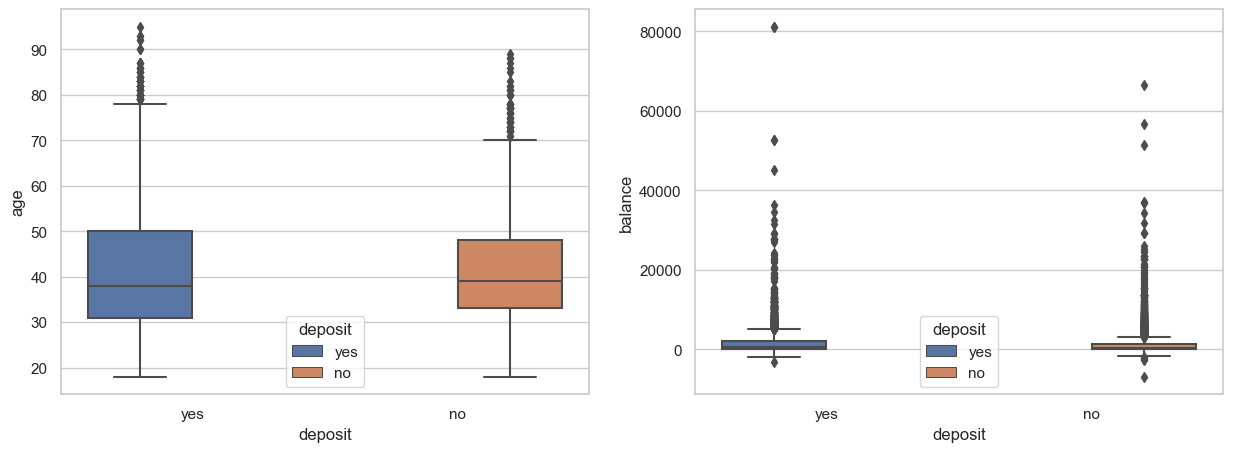

In [303]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), squeeze=False)
axs = axs.flatten()

sns.boxplot(x='deposit', y='age', hue='deposit', data=df_demographic_deposit, ax=axs[0])
sns.boxplot(x='deposit', y='balance', hue='deposit', data=df_demographic_deposit, ax=axs[1])

plt.show()

Age and balance does not show any significince difference for deposit

## 3.3 Exam Campaign Data:

Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day: last contact day of the month (numeric: 1-31)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


In [261]:
df_campaign= df[['contact','month','day','duration','campaign','pdays','previous','poutcome']]

In [263]:
df_campaign.duplicated().sum()

110

In [267]:
df_campaign=df_campaign.drop_duplicates()

In [268]:
df_campaign.duplicated().sum()

0

In [262]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   contact   11162 non-null  object
 1   month     11162 non-null  object
 2   day       11162 non-null  int64 
 3   duration  11162 non-null  int64 
 4   campaign  11162 non-null  int64 
 5   pdays     11162 non-null  int64 
 6   previous  11162 non-null  int64 
 7   poutcome  11162 non-null  object
dtypes: int64(5), object(3)
memory usage: 697.8+ KB


### 3.3.1 Campaign Numeric Feature vs Target Variable

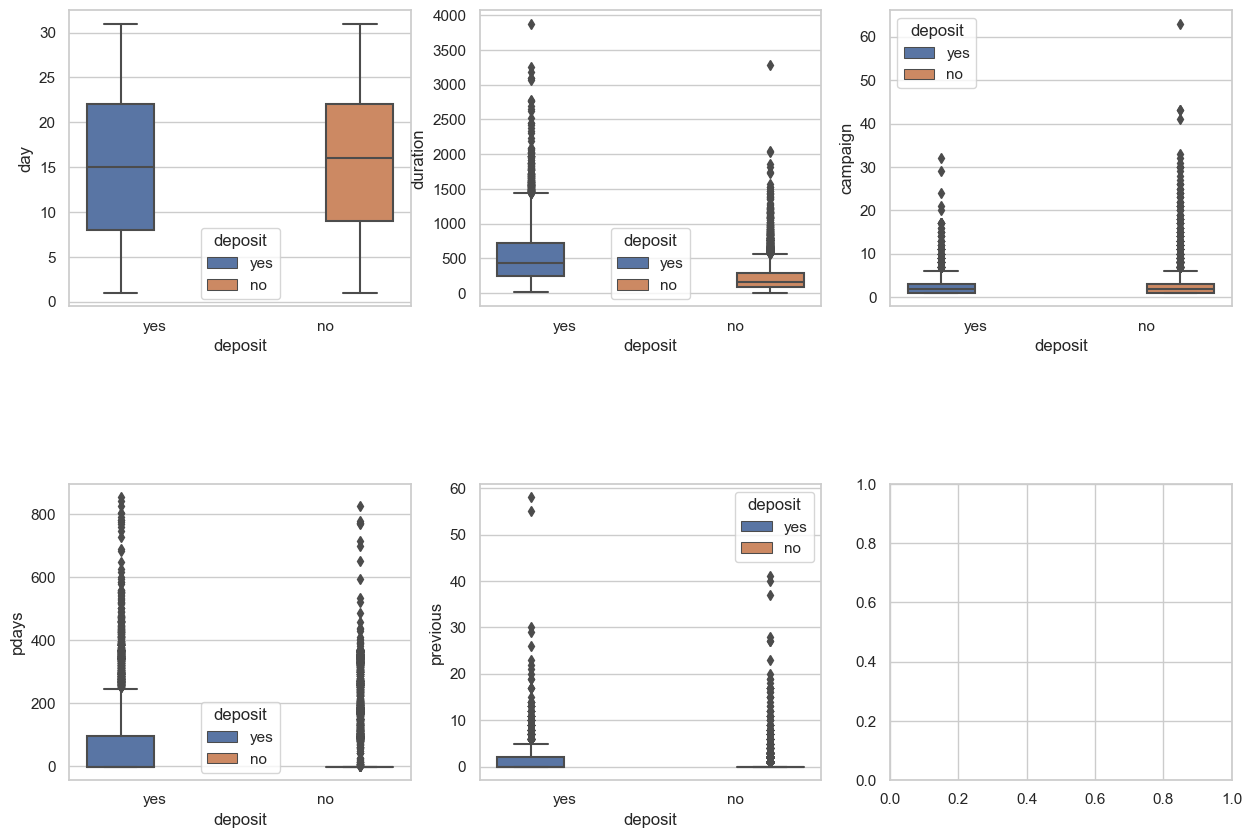

In [281]:
ncols = 3
nrows = int(np.ceil(len(df_campaign.select_dtypes(exclude='object').columns) / ncols))
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows), squeeze=False)
axs = axs.flatten()

for i, col in enumerate(df_campaign.select_dtypes(exclude='object').columns):
    if i < len(axs):
        sns.boxplot(x='deposit', y=df_campaign[col], hue='deposit', data=df, ax=axs[i])

fig.subplots_adjust(hspace=0.6)
plt.show()

We can see that some numerical features have outliers (especially 'pdays', 'campaign' and 'previous' columns). 

Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise. 

Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:

In [283]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


Percentage of 'pdays' values above 400:

In [286]:
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2005017022039062

'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign 

Looking closer into 'pdays' data we can see that:

- only 1.2% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.
- 50% of vlues -1 meaning never been contacted, so we can also consider imput it to 0

In [284]:
# Percentage of 'campaign' values above 20:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.035835871707579285

'campaign' holds the number of contacts performed during this campaign and for this client (numeric, includes last contact) Numbers for 'campaign' above 34 are clearly noise, so I suggest to impute them with average campaign values for pre processing.

In [285]:
# Percentage of 'previous' values above 20:
len (df[df['previous'] > 34] ) / len(df) * 100

0.04479483963447411

'previous' holds the number of contacts performed before this campaign and for this client (numeric). Numbers for 'previous' above 34 are also really strange, so I suggest to impute them with average campaign values for pre processing.

### 3.3.2 Campaign Distribution vs Target variable with Percentage Labels

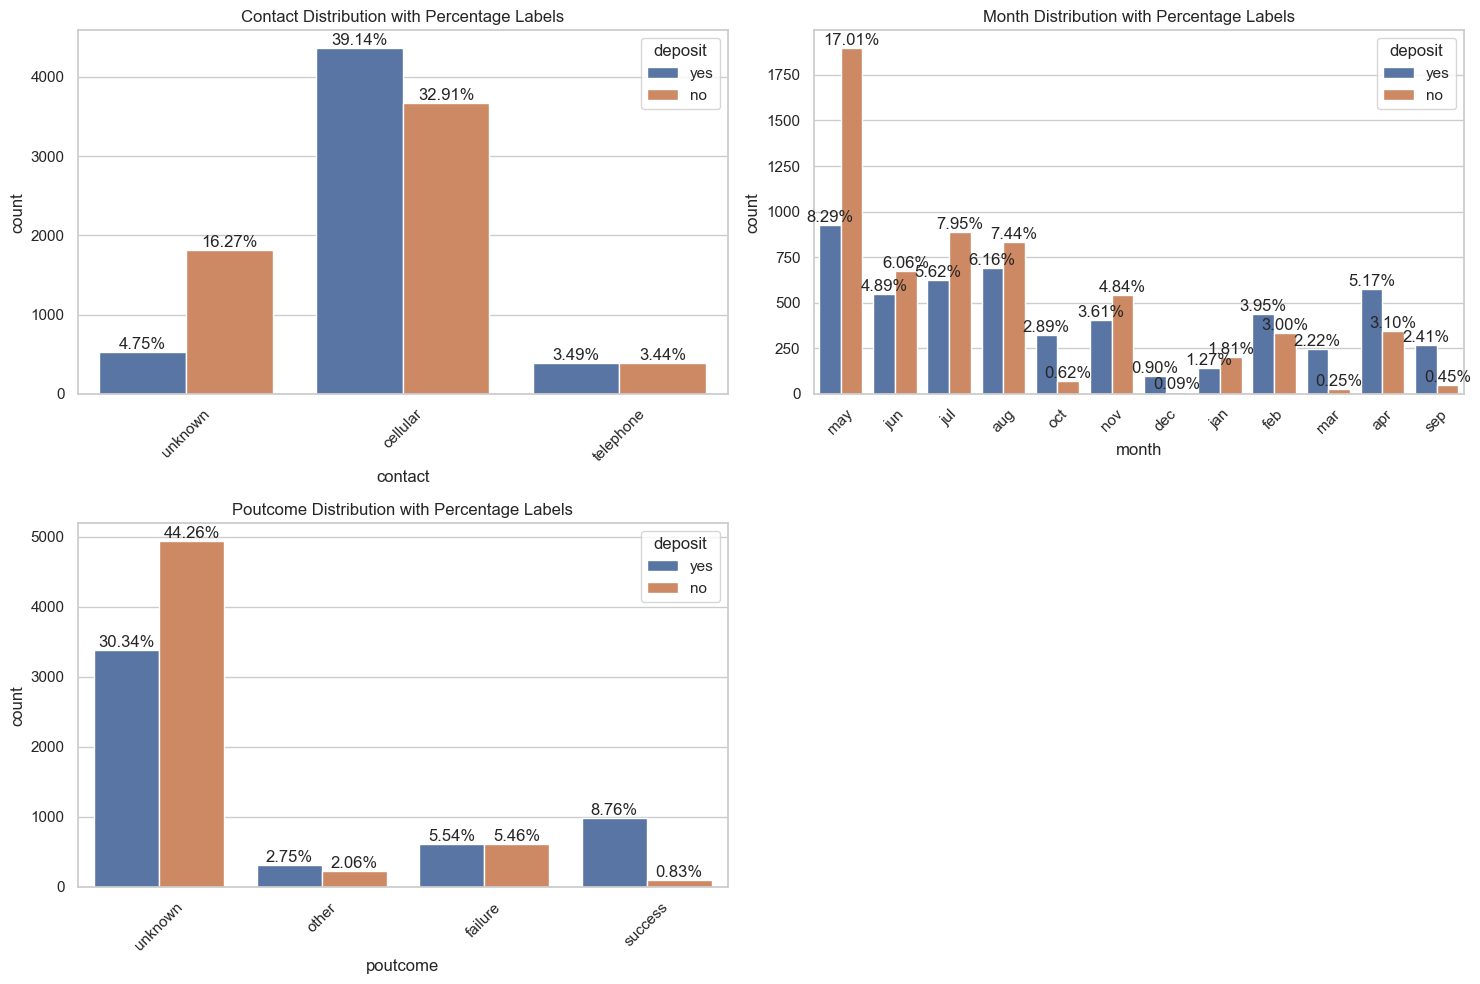

In [317]:
columns_to_plot = ['contact', 'month', 'poutcome']

# Define the number of rows and columns for the grid
n_rows = 2
n_cols = 2

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Create a count plot with percentage labels for each column
for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]
    sns.countplot(x=column, data=df, ax=ax, hue='deposit')

    # Calculate the total count of data points in the current column
    total = len(df[column])

    # Add percentage labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.2f}%'.format(100 * height / total),
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12)

    # Set the title and rotate x-axis labels
    ax.set_title(f"{column.capitalize()} Distribution with Percentage Labels")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout and show the grid of plots
plt.tight_layout()
plt.show()

- Conctact by celler have 39% deposit rate
- May & August have higher deposit rate
- Unknown outcome of the previous marketing campaign has higher depost rate

In [505]:
df_demographic

,age,job,marital,education,default,housing,loan,balance
0,59,admin.,married,secondary,no,yes,no,2343
1,56,admin.,married,secondary,no,no,no,45
2,41,technician,married,secondary,no,yes,no,1270
3,55,services,married,secondary,no,yes,no,2476
4,54,admin.,married,tertiary,no,no,no,184
...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,yes,no,-72
11157,33,blue-collar,single,primary,no,yes,no,1
11158,39,services,married,secondary,no,no,no,733
11159,32,technician,single,secondary,no,no,no,29


## 4. Hypothesis Testing

I will perform some hypothesis testing on the listed variables below to see if there a significant difference of clients who have subscribed to a term deposit.

1. Age vs Term Deposit: 
2. Marital Status vs Term Deposit
3. Balance vs Term Deposit 

### 1. Age (numeric) vs Term Deposit (categorical): Independent two-sample t-test 

Since we want to determine if there is a significant difference in the ages of clients who have subscribed to a term deposit (categorical data) vs. those who have not. In this case, we should use an independent two-sample t-test to compare the means of ages in both groups.

#### 1. Define the null hypothesis (H0) and the alternative hypothesis (H1):
- H0: There is no significant difference in the mean ages between clients who have subscribed to a term deposit and those who have not.
- H1: There is a significant difference in the mean ages between clients who have subscribed to a term deposit and those who have not.

#### 2. Choose a significance level (α): 0.05

#### 3. Split dataset into two groups based on whether the clients have subscribed to a term deposit or not. Make sure you have the age data for both groups.


In [440]:
df_demographic_deposit.deposit = df_demographic_deposit.deposit.replace({'yes': 1, 'no': 0})

# Split the dataset based on term_deposit values
subscribed = df_demographic_deposit[df_demographic_deposit['deposit'] == 1]
not_subscribed = df_demographic_deposit[df_demographic_deposit['deposit'] == 0]

# Extract the age data for both groups
ages_subscribed = subscribed['age'].values
ages_not_subscribed = not_subscribed['age'].values

#### 4. Check assumptions: 
Before performing the t-test, ensure that the assumptions of normality and independence are met. We can use graphical methods (histograms, Q-Q plots) or statistical tests (Shapiro-Wilk test, Kolmogorov-Smirnov test) to check for normality. Independence is generally assumed if the data is collected randomly and independently.


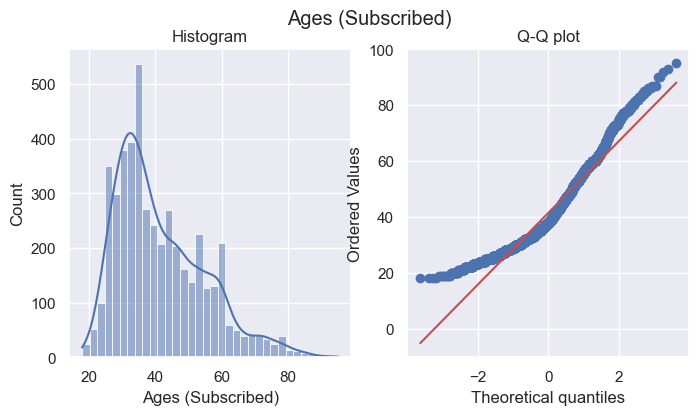

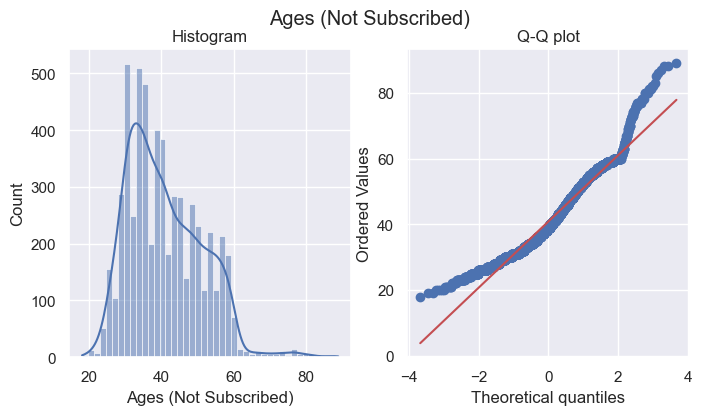

Shapiro-Wilk Test:
Subscribed: Test Statistic = 0.9367198348045349, p-value = 8.936360566692223e-41
Not Subscribed: Test Statistic = 0.9577661156654358, p-value = 5.342130338669113e-38


/Users/tsaijungwang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [461]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to plot histograms and Q-Q plots
def plot_histogram_qq(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # Histogram
    sns.histplot(data, kde=True, ax=ax1)
    ax1.set_title('Histogram')
    ax1.set_xlabel(title)

    # Q-Q plot
    stats.probplot(data, dist='norm', plot=ax2)
    ax2.set_title('Q-Q plot')

    plt.suptitle(title)
    plt.show()

# Plot histograms and Q-Q plots for both groups
plot_histogram_qq(ages_subscribed, 'Ages (Subscribed)')
plot_histogram_qq(ages_not_subscribed, 'Ages (Not Subscribed)')

# Shapiro-Wilk test for normality
sw_stat_subscribed, sw_p_value_subscribed = stats.shapiro(ages_subscribed)
sw_stat_not_subscribed, sw_p_value_not_subscribed = stats.shapiro(ages_not_subscribed)

print("Shapiro-Wilk Test:")
print(f"Subscribed: Test Statistic = {sw_stat_subscribed}, p-value = {sw_p_value_subscribed}")
print(f"Not Subscribed: Test Statistic = {sw_stat_not_subscribed}, p-value = {sw_p_value_not_subscribed}")

The p-value of the test is greater than your chosen significance level (e.g., 0.05), we can assume normality.

#### 5. Test for equal variances:
Perform Levene's test to check if the variances in both groups are equal. This will determine which version of the t-test to use (equal or unequal variances).

In [455]:
import scipy.stats as stats

# Levene's test for equal variances
levene_stat, levene_p_value = stats.levene(ages_subscribed, ages_not_subscribed)

print("Levene's Test:")
print(f"Test Statistic = {levene_stat}, p-value = {levene_p_value}")

Levene's Test:
Test Statistic = 214.98337130861523, p-value = 3.3732581262644514e-48


The p-value from the Levene's test is greater than 0.05, we can assume equal variances.

#### 6. Perform the independent two-sample t-test:
The variances are equal, we can perform a regular two-sample t-test. 
If they are unequal, perform Welch's t-test, which does not assume equal variances.

In [456]:
import scipy.stats as stats

# Perform the independent two-sample t-test with equal variances
t_statistic, p_value = stats.ttest_ind(ages_subscribed, ages_not_subscribed, equal_var=True)

print("Two-Sample t-test with Equal Variances:")
print(f"t-statistic = {t_statistic}, p-value = {p_value}")


Two-Sample t-test with Equal Variances:
t-statistic = 2.6766884072109325, p-value = 0.007446961421082673


#### 7. Interpret the results: Compare the p-value from the t-test to the chosen significance level (α):

The p-value: 0.007446 is less than the significance level: 0.005, **we can reject the null hypothesis, indicating a significant difference in the mean ages between the two groups.**

### 2. Marital Status (categorical) vs Term Deposit (categorical): Chi-square test 

Since we want to determine if there is a significant difference in the marital status of clients who have subscribed to a term deposit vs. those who have not. In this case, we can use use the Chi-square test of independence for comparing categorical data. 

#### 1. Define the null hypothesis (H0) and the alternative hypothesis (H1):
- H0: There is no significant relationship between marital status and term deposit subscription.
- H1: There is a significant relationship between marital status and term deposit subscription.

#### 2. Create a contingency table:
Organize your data into a contingency table (also known as a cross-tabulation), where the rows represent the different marital statuses (e.g., married, single, divorced) and the columns represent the term deposit subscription status (subscribed, not subscribed).

In [463]:
# Create the contingency table using the crosstab function
contingency_table = pd.crosstab(df_demographic_deposit['marital'], df_demographic_deposit['deposit'])

# Rename the columns for better readability
contingency_table.columns = ['Not Subscribed', 'Subscribed']

# Print the contingency table
print(contingency_table)

          Not Subscribed  Subscribed
marital                             
divorced             667         570
married             3533        2408
single              1583        1708


#### 3.Calculate the expected frequencies:
Calculate the expected frequency by multiplying the row total and the column total, and then dividing by the grand total (sum of all cells). This assumes that the null hypothesis is true, meaning that the variables are independent.

In [464]:
# Calculate the row and column totals
row_totals = contingency_table.sum(axis=1)
column_totals = contingency_table.sum(axis=0)

# Calculate the grand total
grand_total = contingency_table.values.sum()

# Initialize an empty DataFrame for expected frequencies with the same shape and index/columns as the contingency table
expected_frequencies = pd.DataFrame(index=contingency_table.index, columns=contingency_table.columns)

# Calculate expected frequencies for each cell
for row in contingency_table.index:
    for col in contingency_table.columns:
        expected_frequencies.at[row, col] = (row_totals[row] * column_totals[col]) / grand_total

# Print the expected frequencies table
print(expected_frequencies)


         Not Subscribed   Subscribed
marital                             
divorced     683.309867   553.690133
married     3281.765498  2659.234502
single      1817.924635  1473.075365


#### 4. Compute the test statistic (Chi-square):
Calculate the Chi-square test statistic by summing the squared differences between the observed frequencies (from the data) and expected frequencies (calculated in step 3), divided by the expected frequencies. The formula is:

χ² = Σ [(O_ij - E_ij)² / E_ij]

where O_ij is the observed frequency and E_ij is the expected frequency for each cell in the table.

In [465]:
# Calculate the squared differences between observed and expected frequencies
squared_diff = (contingency_table - expected_frequencies)**2

# Divide the squared differences by the expected frequencies
squared_diff_normalized = squared_diff / expected_frequencies

# Calculate the Chi-square test statistic by summing all the values in the normalized squared differences table
chi_square = squared_diff_normalized.values.sum()

# Print the Chi-square test statistic
print("Chi-square test statistic:", chi_square)


Chi-square test statistic: 111.66272211197312


#### 5. Determine the degrees of freedom:
Calculate the degrees of freedom (df) for the test using the formula:

df = (number of rows - 1) * (number of columns - 1)

In [466]:
# Calculate the number of rows and columns in the contingency table
num_rows = len(contingency_table.index)
num_columns = len(contingency_table.columns)

# Calculate the degrees of freedom using the formula
degrees_of_freedom = (num_rows - 1) * (num_columns - 1)

# Print the degrees of freedom
print("Degrees of freedom:", degrees_of_freedom)

Degrees of freedom: 2


#### 6. Choose a significance level (alpha): 0.05

#### 7. Find the critical value and p-value:
Using the degrees of freedom and the chosen significance level, find the critical value from a Chi-square distribution table. Alternatively, find the p-value by comparing the test statistic to the Chi-square distribution.

In [467]:
import scipy.stats as stats

# Choose a significance level (alpha)
alpha = 0.05

# Find the critical value using the chi-square distribution and the chosen significance level
critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

# Calculate the p-value by comparing the test statistic to the chi-square distribution
p_value = stats.chi2.sf(chi_square, degrees_of_freedom)

# Print the critical value and p-value
print("Critical value:", critical_value)
print("P-value:", p_value)

Critical value: 5.991464547107979
P-value: 5.659107922144107e-25


#### 8. Interpret the results:
If the test statistic (χ²) is greater than the critical value or the p-value is less than the significance level (alpha), reject the null hypothesis. This means there is a significant relationship between marital status and term deposit subscription. If not, fail to reject the null hypothesis, indicating there's no significant evidence for a relationship between the variables.

The test statistic (χ²): 111.66 is greater than the critical value: 5.99 and the p-value 5.659107922144107e-25 is less than the significance level 0.005, **there is a significant relationship between marital status and term deposit subscription.**

### 3. Balance (numeric) vs Term Deposit (categorical): Independent two-sample t-test 

#### 1. Define the null hypothesis (H0) and the alternative hypothesis (H1):
- H0: There is no significant difference in the balance of clients who have subscribed to a term deposit vs. those who have not.
- H1: There is a significant difference in the balance of clients who have subscribed to a term deposit vs. those who have not.

#### 2. Choose a significance level (α): 0.05

In [468]:
df_demographic_deposit

,age,job,marital,education,default,housing,loan,balance,deposit
0,59,admin.,married,secondary,no,yes,no,2343,1
1,56,admin.,married,secondary,no,no,no,45,1
2,41,technician,married,secondary,no,yes,no,1270,1
3,55,services,married,secondary,no,yes,no,2476,1
4,54,admin.,married,tertiary,no,no,no,184,1
...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,yes,no,-72,0
11157,33,blue-collar,single,primary,no,yes,no,1,0
11158,39,services,married,secondary,no,no,no,733,0
11159,32,technician,single,secondary,no,no,no,29,0


#### 3. Prepare the data 
Ensure that the data is clean, and that there are no missing or erroneous values.

In [491]:
# Separate the data into two groups
term_deposit_yes = df_demographic_deposit[df_demographic_deposit["deposit"] == 1]
term_deposit_no = df_demographic_deposit[df_demographic_deposit["deposit"] == 0]

# Extract the balance data
balances_yes = term_deposit_yes["balance"]
balances_no = term_deposit_no["balance"]

#### 4. Perform a test for normality

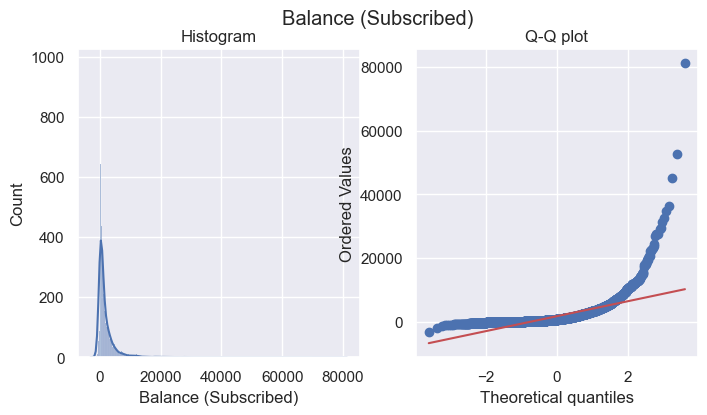

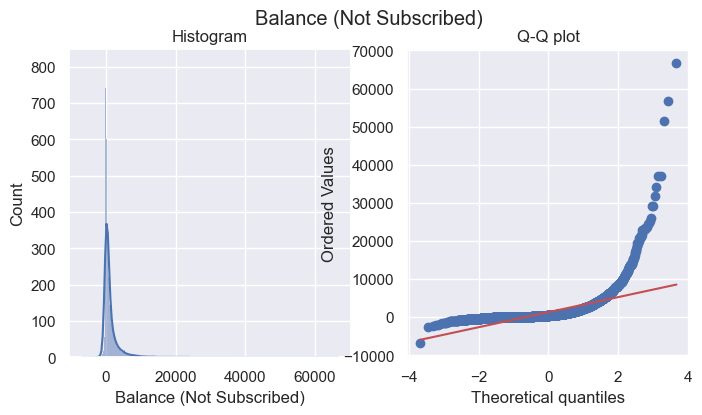

Shapiro-Wilk Test:
Subscribed: Test Statistic = 0.5116134285926819, p-value = 0.0
Not Subscribed: Test Statistic = 0.4498334527015686, p-value = 0.0


/Users/tsaijungwang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [493]:
# Plot histograms and Q-Q plots for both groups
plot_histogram_qq(balances_yes, 'Balance (Subscribed)')
plot_histogram_qq(balances_no, 'Balance (Not Subscribed)')

# Shapiro-Wilk test for normality
sw_stat_subscribed, sw_p_value_subscribed = stats.shapiro(balances_yes)
sw_stat_not_subscribed, sw_p_value_not_subscribed = stats.shapiro(balances_no)

print("Shapiro-Wilk Test:")
print(f"Subscribed: Test Statistic = {sw_stat_subscribed}, p-value = {sw_p_value_subscribed}")
print(f"Not Subscribed: Test Statistic = {sw_stat_not_subscribed}, p-value = {sw_p_value_not_subscribed}")

p-value is less than 0.05, the data is not normally distributed.

#### 5. Test for equal variances:
Perform Levene's test to check if the variances in both groups are equal. This will determine which version of the t-test to use (equal or unequal variances).

In [496]:
import scipy.stats as stats

# Levene's test for equal variances
levene_stat, levene_p_value = stats.levene(balances_yes, balances_no)

print("Levene's Test:")
print(f"Test Statistic = {levene_stat}, p-value = {levene_p_value}")

Levene's Test:
Test Statistic = 32.37199722794284, p-value = 1.3072704834749078e-08


The p-value from the Levene's test is less than 0.05, we can assume unequal variances.

#### 6. Select and perform the appropriate statistical test

In [497]:
import scipy.stats as stats

# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(balances_yes, balances_no, alternative="two-sided")

# Print the results
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

U-statistic: 15876155.0
P-value: 9.846173705747909e-52


#### 7. Interpret the results: Compare the p-value to the chosen significance level (α)

In [499]:
# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the balance of clients who have subscribed to a term deposit vs. those who have not.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a significant difference in the balance of clients who have subscribed to a term deposit vs. those who have not.")


Reject the null hypothesis.
There is a significant difference in the balance of clients who have subscribed to a term deposit vs. those who have not.
